# Dataset Analysis

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Creating a Full Dataset

In [2]:
column_names = [
    "timestamp",
    "activity_id", 
    "heart_rate",
    "IMU_hand_temperature",
    "IMU_hand_3D_acceleration_data_16g_1",
    "IMU_hand_3D_acceleration_data_16g_2",
    "IMU_hand_3D_acceleration_data_16g_3",
    "IMU_hand_3D_acceleration_data_6g_1",
    "IMU_hand_3D_acceleration_data_6g_2",
    "IMU_hand_3D_acceleration_data_6g_3",
    "IMU_hand_3D_gyroscope_data_1",
    "IMU_hand_3D_gyroscope_data_2",
    "IMU_hand_3D_gyroscope_data_3",
    "IMU_hand_3D_magnetometer_data_1",
    "IMU_hand_3D_magnetometer_data_2",
    "IMU_hand_3D_magnetometer_data_3",
    "IMU_hand_orientation_1",
    "IMU_hand_orientation_2",
    "IMU_hand_orientation_3",
    "IMU_hand_orientation_4",
    "IMU_chest_temperature",
    "IMU_chest_3D_acceleration_data_16g_1",
    "IMU_chest_3D_acceleration_data_16g_2",
    "IMU_chest_3D_acceleration_data_16g_3",
    "IMU_chest_3D_acceleration_data_6g_1",
    "IMU_chest_3D_acceleration_data_6g_2",
    "IMU_chest_3D_acceleration_data_6g_3",
    "IMU_chest_3D_gyroscope_data_1",
    "IMU_chest_3D_gyroscope_data_2",
    "IMU_chest_3D_gyroscope_data_3",
    "IMU_chest_3D_magnetometer_data_1",
    "IMU_chest_3D_magnetometer_data_2",
    "IMU_chest_3D_magnetometer_data_3",
    "IMU_chest_orientation_1",
    "IMU_chest_orientation_2",
    "IMU_chest_orientation_3",
    "IMU_chest_orientation_4",
    "IMU_ankle_temperature",
    "IMU_ankle_3D_acceleration_data_16g_1",
    "IMU_ankle_3D_acceleration_data_16g_2",
    "IMU_ankle_3D_acceleration_data_16g_3",
    "IMU_ankle_3D_acceleration_data_6g_1",
    "IMU_ankle_3D_acceleration_data_6g_2",
    "IMU_ankle_3D_acceleration_data_6g_3",
    "IMU_ankle_3D_gyroscope_data_1",
    "IMU_ankle_3D_gyroscope_data_2",
    "IMU_ankle_3D_gyroscope_data_3",
    "IMU_ankle_3D_magnetometer_data_1",
    "IMU_ankle_3D_magnetometer_data_2",
    "IMU_ankle_3D_magnetometer_data_3",
    "IMU_ankle_orientation_1",
    "IMU_ankle_orientation_2",
    "IMU_ankle_orientation_3",
    "IMU_ankle_orientation_4"
]

col_for_drop = [col for col in column_names if col.endswith(tuple(f"orientation_{i}" for i in range(1, 5)))]
col_for_drop += [col for col in column_names if col.endswith(tuple(f"acceleration_data_6g_{i}" for i in range(1, 4)))]

In [3]:
person1 = pd.read_csv("Protocol/subject101.dat", delimiter=" ", names=column_names, header=None)
person2 = pd.read_csv("Protocol/subject102.dat", delimiter=" ", names=column_names, header=None)
person3 = pd.read_csv("Protocol/subject103.dat", delimiter=" ", names=column_names, header=None)
person4 = pd.read_csv("Protocol/subject104.dat", delimiter=" ", names=column_names, header=None)
person5 = pd.read_csv("Protocol/subject105.dat", delimiter=" ", names=column_names, header=None)
person6 = pd.read_csv("Protocol/subject106.dat", delimiter=" ", names=column_names, header=None)
person7 = pd.read_csv("Protocol/subject107.dat", delimiter=" ", names=column_names, header=None)
person8 = pd.read_csv("Protocol/subject108.dat", delimiter=" ", names=column_names, header=None)
person9 = pd.read_csv("Protocol/subject109.dat", delimiter=" ", names=column_names, header=None)

person1_additional = pd.read_csv("Optional/subject101.dat", delimiter=" ", names=column_names, header=None)
person5_additional = pd.read_csv("Optional/subject105.dat", delimiter=" ", names=column_names, header=None)
person6_additional = pd.read_csv("Optional/subject106.dat", delimiter=" ", names=column_names, header=None)
person8_additional = pd.read_csv("Optional/subject108.dat", delimiter=" ", names=column_names, header=None)
person9_additional = pd.read_csv("Optional/subject109.dat", delimiter=" ", names=column_names, header=None)

## Data Preprocessing

***
### –ó–∞–ø–æ–ª–Ω–µ–Ω–∏–µ –ø—É–ª—å—Å–∞:
***

In [4]:
df_list = [person1, person2, person3, person4, person5, person6, person7, person8, person9, 
           person1_additional, person5_additional, person6_additional, person8_additional, person9_additional]

for df in df_list:
    hr_positions = np.flatnonzero(df['heart_rate'].notna())
    if len(hr_positions) < 2:
        continue
    first_idx, second_idx = hr_positions[0], hr_positions[1]
    hr_1 = df['heart_rate'].iat[first_idx]
    hr_2 = df['heart_rate'].iat[second_idx]
    for pos in hr_positions[2:]:
        fill_val = (hr_1 + hr_2) / 2
        df.loc[first_idx + 1 : second_idx, 'heart_rate'] = (
            df.loc[first_idx + 1 : second_idx, 'heart_rate'].fillna(fill_val)
        )
        first_idx, second_idx = second_idx, pos
        hr_1, hr_2 = hr_2, df['heart_rate'].iat[pos]
    df.loc[second_idx + 1 :, 'heart_rate'] = (
        df.loc[second_idx + 1 :, 'heart_rate'].fillna(hr_2)
    )

## Dataset Splitting with Temporal Consistency

***
### –°–æ–∑–¥–∞–Ω–∏–µ df_all —Å —É—á–µ—Ç–æ–º –¥–µ–ª–µ–Ω–∏—è –Ω–∞ –ª—é–¥–µ–π –∏ –≤—Ä–µ–º–µ–Ω–Ω–æ–π —Å–æ–≥–ª–∞—Å–æ–≤–∞–Ω–Ω–æ—Å—Ç–∏:
***

In [5]:
all_classes = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]

subjects = {
    1: [person1, person1_additional],
    2: [person2],
    3: [person3],
    4: [person4],
    5: [person5, person5_additional],
    6: [person6, person6_additional],
    7: [person7],
    8: [person8, person8_additional],
    9: [person9, person9_additional]
}

df_all = pd.DataFrame()
for subject_id, dfs in subjects.items():
    df_subject = pd.concat(dfs, axis=0, ignore_index=True)
    df_subject['subject_id'] = subject_id
    df_all = pd.concat([df_all, df_subject], axis=0, ignore_index=True)

df_all = df_all.drop(columns=col_for_drop)
df_all = df_all.dropna()
df_all = df_all[df_all["activity_id"] != 0]

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–µ–π:
unique_activities = sorted(df_all['activity_id'].unique())
print(f"Unique activities in combined dataset: {unique_activities}")
if set(unique_activities) == set(all_classes):
    print("All required classes are present in the combined dataset.")
else:
    print(f"Warning: Missing classes {set(all_classes) - set(unique_activities)}")

Unique activities in combined dataset: [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]
All required classes are present in the combined dataset.


***
### –ú–∏–Ω–∏-EDA –¥–ª—è –¥–∞—Ç–∞—Å–µ—Ç–∞:
***

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

print("–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞:", df_all.shape)
print("\n–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:")
print(df_all.head())
print("\n–¢–∏–ø—ã –¥–∞–Ω–Ω—ã—Ö:")
print(df_all.dtypes)

numeric_cols = df_all.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('activity_id')
numeric_cols.remove('subject_id')
categorical_cols = ['activity_id', 'subject_id']
print("\n–ß–∏—Å–ª–æ–≤—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:", numeric_cols)
print("–ö–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏:", categorical_cols)

–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: (2700980, 34)

–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫:
      timestamp  activity_id  heart_rate  IMU_hand_temperature  \
2928      37.66            1       100.0                30.375   
2929      37.67            1       100.0                30.375   
2930      37.68            1       100.0                30.375   
2931      37.69            1       100.0                30.375   
2932      37.70            1       100.0                30.375   

      IMU_hand_3D_acceleration_data_16g_1  \
2928                              2.21530   
2929                              2.29196   
2930                              2.29090   
2931                              2.21800   
2932                              2.30106   

      IMU_hand_3D_acceleration_data_16g_2  \
2928                              8.27915   
2929                              7.67288   
2930                              7.14240   
2931                              7.14365   
2932                              

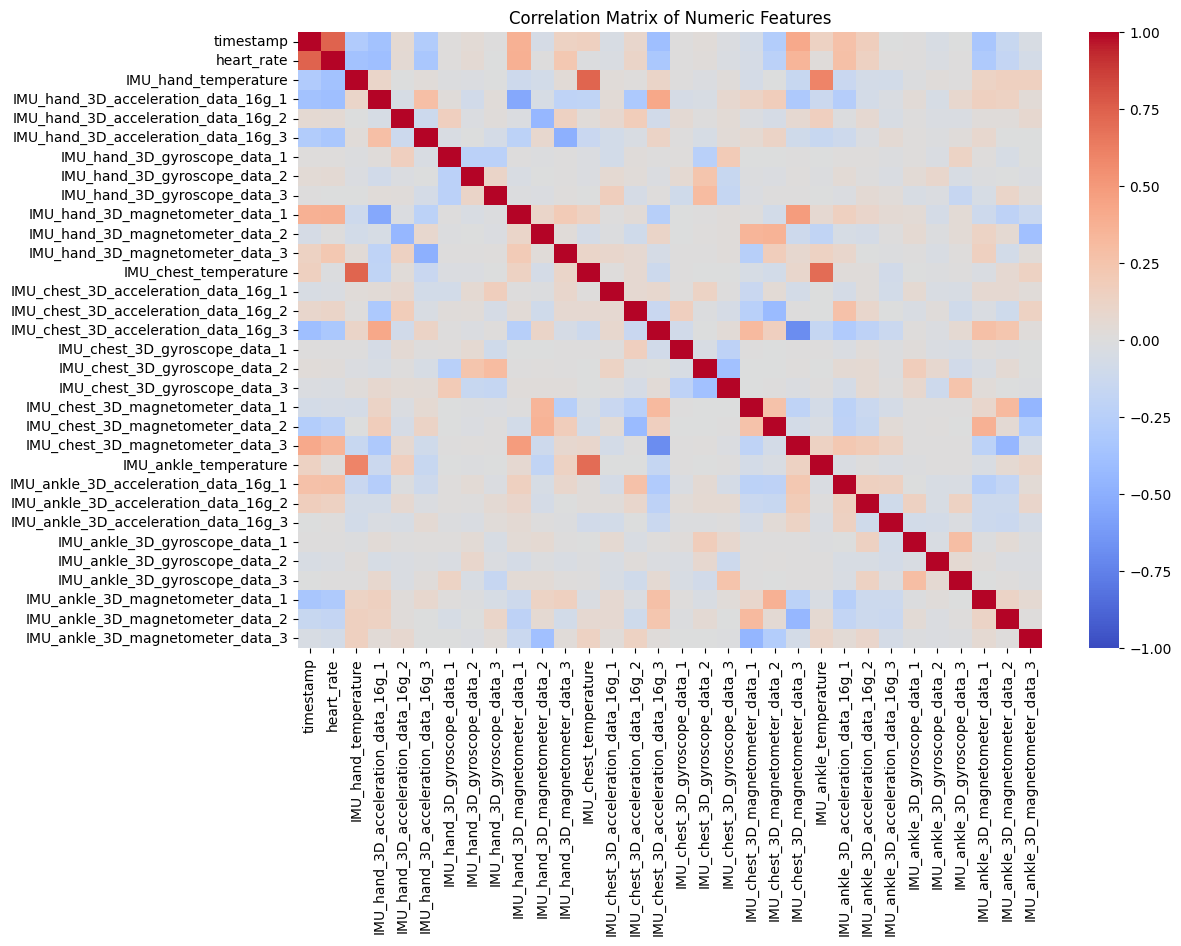


–í—ã—Å–æ–∫–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (|corr| > 0.7):
timestamp              heart_rate               0.735400
heart_rate             timestamp                0.735400
IMU_hand_temperature   IMU_chest_temperature    0.729378
IMU_chest_temperature  IMU_hand_temperature     0.729378
dtype: float64


In [7]:
# –ú–∞—Ç—Ä–∏—Ü–∞ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–π –¥–ª—è —á–∏—Å–ª–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ
plt.figure(figsize=(12, 8))
corr_matrix = df_all[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

corr_pairs = corr_matrix.unstack()
high_corr = corr_pairs[(abs(corr_pairs) > 0.7) & (abs(corr_pairs) < 1)].sort_values(ascending=False)
print("\n–í—ã—Å–æ–∫–∏–µ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏ (|corr| > 0.7):")
print(high_corr)

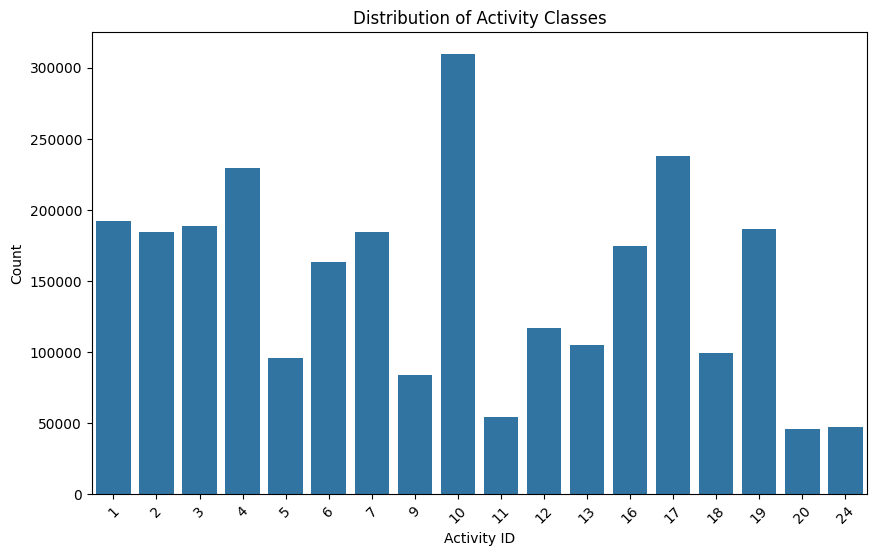

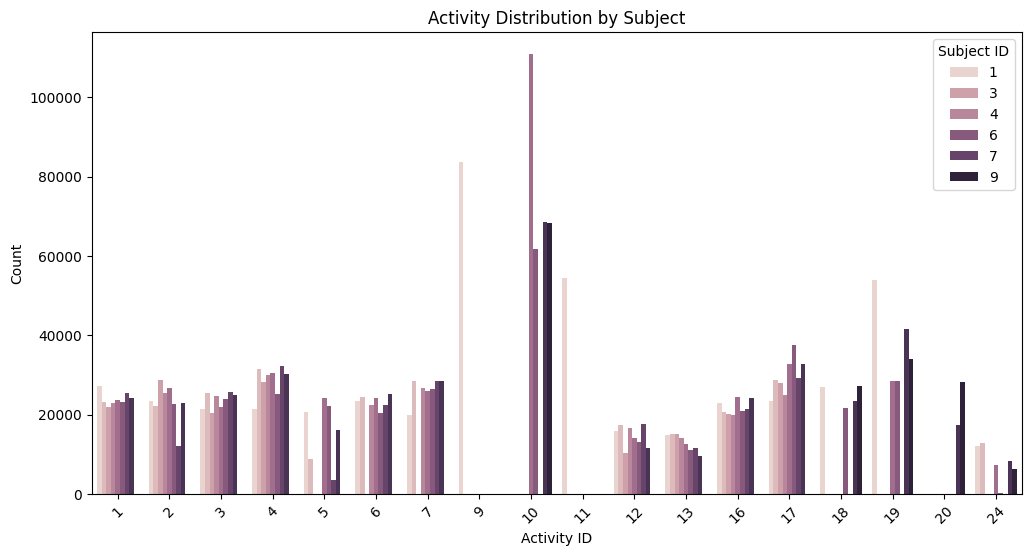


–î–æ–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ activity_id:
activity_id
10    0.114626
17    0.088080
4     0.085047
1     0.071193
3     0.069969
19    0.069093
2     0.068362
7     0.068288
16    0.064782
6     0.060460
12    0.043352
13    0.038825
18    0.036821
5     0.035406
9     0.030960
11    0.020158
24    0.017608
20    0.016970
Name: proportion, dtype: float64


In [8]:
# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ activity_id
plt.figure(figsize=(10, 6))
sns.countplot(x='activity_id', data=df_all, order=sorted(df_all['activity_id'].unique()))
plt.title('Distribution of Activity Classes')
plt.xlabel('Activity ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# –†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ activity_id –ø–æ —Å—É–±—ä–µ–∫—Ç–∞–º
plt.figure(figsize=(12, 6))
sns.countplot(x='activity_id', hue='subject_id', data=df_all, order=sorted(df_all['activity_id'].unique()))
plt.title('Activity Distribution by Subject')
plt.xlabel('Activity ID')
plt.ylabel('Count')
plt.legend(title='Subject ID')
plt.xticks(rotation=45)
plt.show()

# –î–æ–ª—è –∫–ª–∞—Å—Å–æ–≤
class_counts = df_all['activity_id'].value_counts(normalize=True)
print("\n–î–æ–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Å–∞ activity_id:")
print(class_counts)

–í—ã–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –¥–∏–Ω–∞–º–∏–∫–∏: ['IMU_hand_3D_acceleration_data_16g_1', 'IMU_hand_3D_acceleration_data_16g_2', 'IMU_hand_3D_acceleration_data_16g_3']


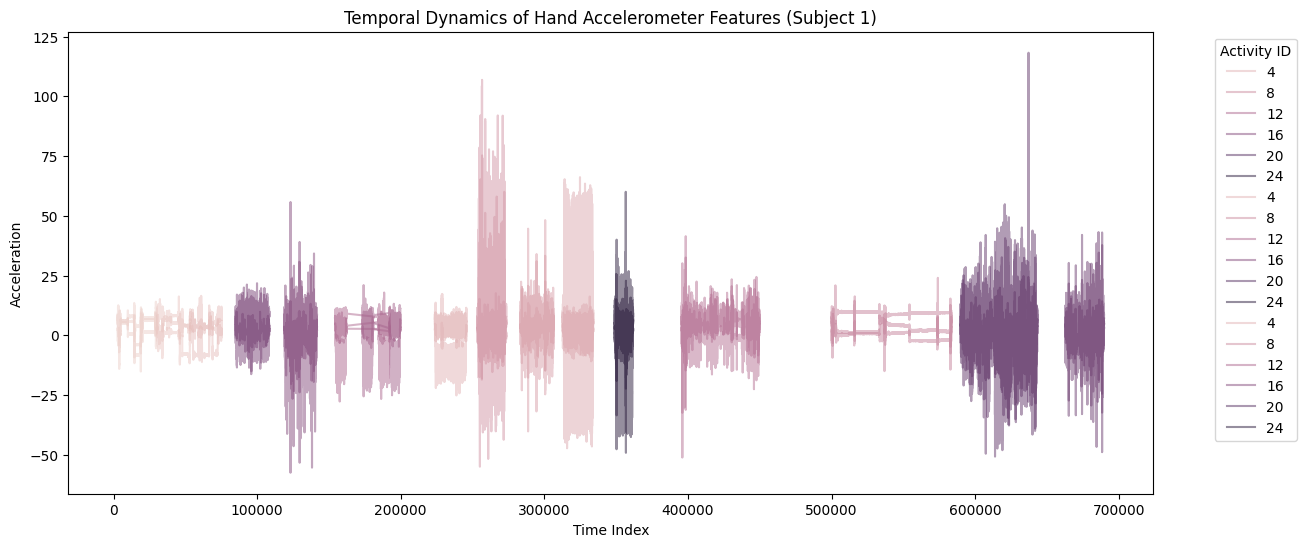

In [9]:
accel_cols = [col for col in numeric_cols if 'accel' in col and 'hand' in col]
print("–í—ã–±—Ä–∞–Ω–Ω—ã–µ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –∞–Ω–∞–ª–∏–∑–∞ –¥–∏–Ω–∞–º–∏–∫–∏:", accel_cols)

subject_1 = df_all[df_all['subject_id'] == 1].copy()
subject_1['time'] = subject_1.index

plt.figure(figsize=(14, 6))
for col in accel_cols:
    sns.lineplot(x='time', y=col, hue='activity_id', data=subject_1, alpha=0.5)
plt.title('Temporal Dynamics of Hand Accelerometer Features (Subject 1)')
plt.xlabel('Time Index')
plt.ylabel('Acceleration')
plt.legend(title='Activity ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [10]:
# Boxplot –¥–ª—è —Ç–æ–ø-–ø—Ä–∏–∑–Ω–∞–∫–æ–≤
plt.figure(figsize=(14, 6))
for i, col in enumerate(top_numeric_cols[:3], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='activity_id', y=col, data=df_all)
    plt.title(f'Boxplot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Violin Plot
plt.figure(figsize=(14, 6))
for i, col in enumerate(top_numeric_cols[:3], 1):
    plt.subplot(1, 3, i)
    sns.violinplot(x='activity_id', y=col, data=df_all)
    plt.title(f'Violin Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'top_numeric_cols' is not defined

<Figure size 1400x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

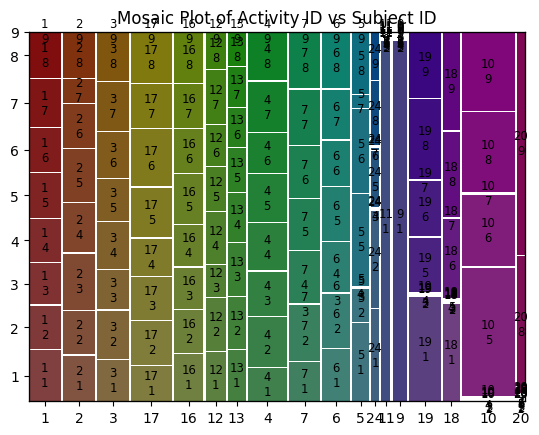

In [11]:
from statsmodels.graphics.mosaicplot import mosaic

# –ú–æ–∑–∞–∏—á–Ω—ã–π –ø–ª–æ—Ç –¥–ª—è activity_id –∏ subject_i
plt.figure(figsize=(10, 6))
mosaic(df_all, ['activity_id', 'subject_id'], title='Mosaic Plot of Activity ID vs Subject ID')
plt.show()

In [12]:
# –ü—Ä–æ–≤–µ—Ä–∫–∞ –∞–Ω–æ–º–∞–ª–∏–π (–Ω–∞–ø—Ä–∏–º–µ—Ä, —ç–∫—Å—Ç—Ä–µ–º–∞–ª—å–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è)
from scipy.stats import zscore
z_scores = df_all[numeric_cols].apply(zscore)
outliers = (z_scores.abs() > 3).sum()
print("\n–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤ (|z-score| > 3) –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º:")
print(outliers[outliers > 0])


–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤ (|z-score| > 3) –ø–æ –ø—Ä–∏–∑–Ω–∞–∫–∞–º:
heart_rate                              13315
IMU_hand_temperature                    34765
IMU_hand_3D_acceleration_data_16g_1     17807
IMU_hand_3D_acceleration_data_16g_2     34378
IMU_hand_3D_acceleration_data_16g_3     25277
IMU_hand_3D_gyroscope_data_1            61218
IMU_hand_3D_gyroscope_data_2            64722
IMU_hand_3D_gyroscope_data_3            65752
IMU_hand_3D_magnetometer_data_1          6353
IMU_hand_3D_magnetometer_data_2          9783
IMU_hand_3D_magnetometer_data_3         55534
IMU_chest_3D_acceleration_data_16g_1    40819
IMU_chest_3D_acceleration_data_16g_2    37653
IMU_chest_3D_acceleration_data_16g_3     5732
IMU_chest_3D_gyroscope_data_1           48357
IMU_chest_3D_gyroscope_data_2           70556
IMU_chest_3D_gyroscope_data_3           51444
IMU_chest_3D_magnetometer_data_1         7165
IMU_chest_3D_magnetometer_data_2        20050
IMU_chest_3D_magnetometer_data_3         2811


***
### –†–∞–∑–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ —Ç—Ä–µ–π–Ω –∏ —Ç–µ—Å—Ç —Å —É—á–µ—Ç–æ–º –≤—Ä–µ–º–µ–Ω–∏ (–∫–ª–∞—Å—Å—ã –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ –ø–æ–ø–∞–ª–∏ - –ø–æ—Ç–æ–º –¥–æ–±–∞–≤–ª—è—é—Ç—Å—è –ø–æ –º–∞—Å–∫–µ –∏ –∑–∞–Ω–æ–≤–æ —Å–æ—Ä—Ç–∏—Ä—É—é—Ç—Å—è –ø–æ –ª—é–¥—è–º –∏ –≤—Ä–µ–º–µ–Ω–∏ –¥–ª—è —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è –ø–æ—Ä—è–¥–∫–∞):
***

In [13]:
import pandas as pd

all_classes = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]

# –£–±–µ–¥–∏–º—Å—è, —á—Ç–æ df_all –æ—Ç—Å–æ—Ä—Ç–∏—Ä–æ–≤–∞–Ω –ø–æ –≤—Ä–µ–º–µ–Ω–∏
df_all = df_all.sort_values(by=['subject_id', 'timestamp'])

train_df = pd.DataFrame()
test_df = pd.DataFrame()

# –°–æ—Ä—Ç–∏—Ä—É–µ–º subject_id –ø–æ –ø–µ—Ä–≤–æ–π –≤—Ä–µ–º–µ–Ω–Ω–æ–π –º–µ—Ç–∫–µ
subject_order = df_all.groupby('subject_id')['timestamp'].min().sort_values().index

for subject_id in subject_order:
    df_subject = df_all[df_all['subject_id'] == subject_id]
    split_idx = int(len(df_subject) * 0.8)
    if split_idx == 0 or split_idx >= len(df_subject):
        print(f"Warning: Subject {subject_id} has insufficient data for splitting.")
        continue
    train_part = df_subject.iloc[:split_idx]
    test_part = df_subject.iloc[split_idx:]
    train_df = pd.concat([train_df, train_part], axis=0, ignore_index=True)
    test_df = pd.concat([test_df, test_part], axis=0, ignore_index=True)

print(f"Train set size: {len(train_df)}, Test set size: {len(test_df)}")
train_classes = sorted(train_df['activity_id'].unique())
test_classes = sorted(test_df['activity_id'].unique())
print(f"Train classes: {train_classes}")
print(f"Test classes: {test_classes}")

missing_train = set(all_classes) - set(train_classes)
missing_test = set(all_classes) - set(test_classes)
if missing_train or missing_test:
    print(f"Warning: Missing classes in train: {missing_train}, test: {missing_test}")
    for activity in missing_train.union(missing_test):
        activity_data = df_all[df_all['activity_id'] == activity]
        if len(activity_data) > 0:
            split_idx = int(len(activity_data) * 0.8)
            if split_idx == 0:
                split_idx = 1
            if split_idx >= len(activity_data):
                split_idx = len(activity_data) - 1
            train_part = activity_data.iloc[:split_idx]
            test_part = activity_data.iloc[split_idx:]
            train_df = pd.concat([train_df, train_part], axis=0, ignore_index=True)
            test_df = pd.concat([test_df, test_part], axis=0, ignore_index=True)

# –°–æ—Ä—Ç–∏—Ä—É–µ–º –∏—Ç–æ–≥–æ–≤—ã–µ –Ω–∞–±–æ—Ä—ã –¥–∞–Ω–Ω—ã—Ö –ø–æ subject_id, –∞ –∑–∞—Ç–µ–º –ø–æ –≤—Ä–µ–º–µ–Ω
train_df = train_df.sort_values(by=['subject_id', 'timestamp'])
test_df = test_df.sort_values(by=['subject_id', 'timestamp'])

train_classes = sorted(train_df['activity_id'].unique())
test_classes = sorted(test_df['activity_id'].unique())
print(f"Final train classes: {train_classes}")
print(f"Final test classes: {test_classes}")
if set(train_classes) == set(test_classes) == set(all_classes):
    print("All classes are present in both train and test sets.")
else:
    print(f"Warning: Still missing classes in train: {set(all_classes) - set(train_classes)}, test: {set(all_classes) - set(test_classes)}")

Train set size: 2160781, Test set size: 540199
Train classes: [1, 2, 3, 4, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]
Test classes: [4, 5, 6, 7, 12, 13, 18, 19, 20, 24]
Final train classes: [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]
Final test classes: [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]
All classes are present in both train and test sets.


## Feature Engineering

In [14]:
for df in [train_df, test_df]:
    df["sum_temperature"] = (
        df["IMU_hand_temperature"] +
        df["IMU_chest_temperature"] +
        df["IMU_ankle_temperature"]
    )
    df["sum_hand_acceleration"] = (
        df["IMU_hand_3D_acceleration_data_16g_1"] +
        df["IMU_hand_3D_acceleration_data_16g_2"] +
        df["IMU_hand_3D_acceleration_data_16g_3"]
    )
    df["sum_chest_acceleration"] = (
        df["IMU_chest_3D_acceleration_data_16g_1"] +
        df["IMU_chest_3D_acceleration_data_16g_2"] +
        df["IMU_chest_3D_acceleration_data_16g_3"]
    )
    df["sum_ankle_acceleration"] = (
        df["IMU_ankle_3D_acceleration_data_16g_1"] +
        df["IMU_ankle_3D_acceleration_data_16g_2"] +
        df["IMU_ankle_3D_acceleration_data_16g_3"]
    )
    df["heart_rate_rolling_mean"] = df["heart_rate"].rolling(window=5, min_periods=1).mean()

## Encoding and Preparation for Modeling

In [26]:
X_train = train_df.drop(columns=["activity_id", "subject_id", "timestamp"])
y_train = train_df["activity_id"]
X_test = test_df.drop(columns=["activity_id", "subject_id", "timestamp"])
y_test = test_df["activity_id"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

## Sequence Preparation for HMM (–ø–æ–∫–∞ –Ω–µ –Ω—É–∂–Ω–æ)

In [16]:
import numpy as np

def create_sequences(X, y, window_size=100):
    sequences = []
    labels = []
    X_values = X.values if hasattr(X, 'values') else X
    y_values = np.asarray(y)
    
    for i in range(0, len(X) - window_size + 1, window_size):
        sequences.append(X_values[i:i + window_size])
        labels.append(np.bincount(y_values[i:i + window_size].astype(int)).argmax())
    return np.array(sequences), np.array(labels)

X_train_seq, y_train_seq = create_sequences(X_train, y_train_enc)
X_test_seq, y_test_seq = create_sequences(X_test, y_test_enc)

print(f"Train sequences: {X_train_seq.shape}, Test sequences: {X_test_seq.shape}")

Train sequences: (35090, 100, 37), Test sequences: (8772, 100, 37)


***
### –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–∫ –Ω–∞ –ø–æ–¥–≤—ã–±–æ—Ä–∫–µ –¥–∞—Ç–∞—Å–µ—Ç–∞:
***

***
#### XGBoost:
***

In [34]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.utils import resample

# –ü–æ–¥–≤—ã–±–æ—Ä–∫–∞ 30% —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —É—Å–∫–æ—Ä–µ–Ω–∏—è
# X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=int(0.3 * len(X_train)), random_state=42)
X_train_sub, y_train_sub = X_train, y_train

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç–æ–∫
train_classes = np.unique(y_train_sub)
le = LabelEncoder().fit(train_classes)
y_train_enc = le.transform(y_train_sub)

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞ (—Ç–æ–ª—å–∫–æ –∫–ª–∞—Å—Å—ã –∏–∑ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–≥–æ)
test_mask = np.isin(y_test, train_classes)
X_test_filt = X_test[test_mask]
y_test_filt = y_test[test_mask]

# –ü–∞–π–ø–ª–∞–π–Ω —Å –º–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ–º –∏ –º–æ–¥–µ–ª—å—é
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', XGBClassifier(
        objective='multi:softprob',
        n_estimators=100,  # –£–º–µ–Ω—å—à–µ–Ω–æ –¥–ª—è —Å–∫–æ—Ä–æ—Å—Ç–∏
        learning_rate=0.1,
        max_depth=10,  # –£–º–µ–Ω—å—à–µ–Ω–æ
        random_state=42
    ))
])

# –û–±—É—á–µ–Ω–∏–µ
pipeline.fit(X_train_sub, y_train_enc)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_enc = pipeline.predict(X_test_filt)
y_pred = le.inverse_transform(y_pred_enc)

# –û—Ü–µ–Ω–∫–∞
print("XGBoost Classification Report:")
print(classification_report(y_test_filt, y_pred))

XGBoost Classification Report:
              precision    recall  f1-score   support

           1       0.97      1.00      0.98     38458
           2       0.98      0.97      0.98     36929
           3       0.94      1.00      0.97     37797
           4       0.10      0.19      0.13     34730
           5       0.74      0.73      0.73    114758
           6       0.82      0.94      0.88    195963
           7       0.97      0.22      0.35    137233
           9       1.00      1.00      1.00     16725
          10       1.00      1.00      1.00     61921
          11       1.00      1.00      1.00     10890
          12       0.04      0.96      0.08      1736
          13       0.39      0.95      0.55      4640
          16       0.98      1.00      0.99     34996
          17       0.95      0.99      0.97     47581
          18       0.76      0.04      0.08     31473
          19       0.07      1.00      0.12      1902
          20       0.20      0.39      0.26     28

***
#### XGBoost Random Search:
***

In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.utils import resample

# –ü–æ–¥–≤—ã–±–æ—Ä–∫–∞ 30% —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
# X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=int(0.3 * len(X_train)), random_state=42)
X_train_sub, y_train_sub = X_train, y_train

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç–æ–∫
train_classes = np.unique(y_train_sub)
le = LabelEncoder().fit(train_classes)
y_train_enc = le.transform(y_train_sub)

# –§–∏–ª—å—Ç—Ä–∞—Ü–∏—è —Ç–µ—Å—Ç–æ–≤–æ–≥–æ –Ω–∞–±–æ—Ä–∞
mask = np.isin(y_test, train_classes)
X_test_filt = X_test[mask]
y_test_filt = y_test[mask]

# –ú–æ–¥–µ–ª—å
model = XGBClassifier(objective='multi:softprob', random_state=42)

# –£–ø—Ä–æ—â–µ–Ω–Ω—ã–π –ø–æ–∏—Å–∫ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤
param_dist = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1]
}

# –°—Ç–æ—Ö–∞—Å—Ç–∏—á–µ—Å–∫–∏–π –ø–æ–∏—Å–∫
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=4,  # –ú–µ–Ω—å—à–µ –∏—Ç–µ—Ä–∞—Ü–∏–π
    scoring='accuracy',
    cv=2,  # –ú–µ–Ω—å—à–µ —Ñ–æ–ª–¥–æ–≤
    n_jobs=-1,
    verbose=1
)

# –û–±—É—á–µ–Ω–∏–µ
random_search.fit(X_train_sub, y_train_enc)

# –õ—É—á—à–∞—è –º–æ–¥–µ–ª—å
best_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_enc = best_model.predict(X_test_filt)
y_pred = le.inverse_transform(y_pred_enc)

# –û—Ü–µ–Ω–∫–∞
print("XGBoost Random Search Classification Report:")
print(classification_report(y_test_filt, y_pred))

***
#### Random Forest:
***

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.97      0.98     38458
           2       0.98      0.95      0.96     36929
           3       0.86      0.97      0.91     37797
           4       0.38      0.99      0.55     34730
           5       0.50      0.65      0.56    114758
           6       0.92      0.89      0.91    195963
           7       0.98      0.09      0.16    137233
           9       1.00      0.94      0.97     16725
          10       0.99      0.98      0.99     61921
          11       1.00      0.91      0.95     10890
          12       0.02      0.30      0.04      1736
          13       0.30      0.63      0.41      4640
          16       0.62      0.85      0.72     34996
          17       0.72      0.98      0.83     47581
          18       1.00      0.03      0.07     31473
          19       0.07      1.00      0.12      1902
          20       0.00      0.01      0.00 

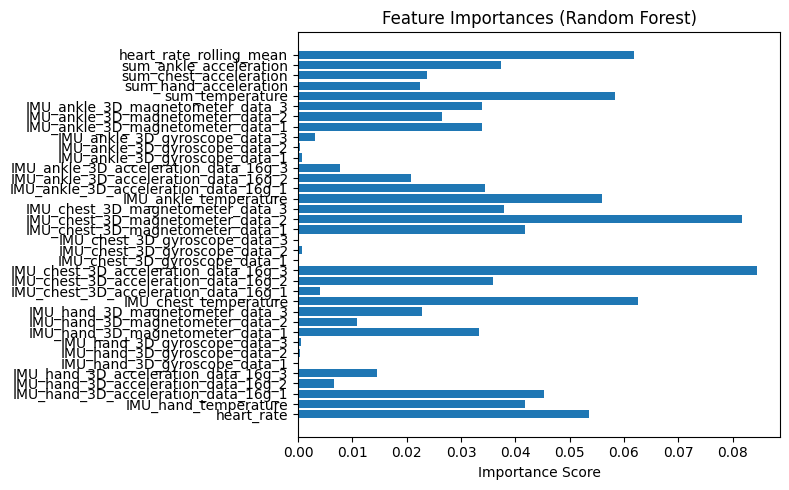

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample

# –ü–æ–¥–≤—ã–±–æ—Ä–∫–∞ 30% —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
# X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=int(0.3 * len(X_train)), random_state=42)
X_train_sub, y_train_sub = X_train, y_train

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç–æ–∫
le = LabelEncoder().fit(all_classes)
y_train_enc = le.transform(y_train_sub)
y_test_enc = le.transform(y_test)

# –ú–æ–¥–µ–ª—å
model = RandomForestClassifier(
    n_estimators=300,  # –£–º–µ–Ω—å—à–µ–Ω–æ
    max_depth=8,  # –£–º–µ–Ω—å—à–µ–Ω–æ
    random_state=42,
    n_jobs=-1
)

# –û–±—É—á–µ–Ω–∏–µ
model.fit(X_train_sub, y_train_enc)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_enc = model.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)

# –û—Ü–µ–Ω–∫–∞
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
importances = model.feature_importances_
features = X_train.columns
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

***
#### Logistic Regression:
***

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.98      0.96      0.97     38458
           2       0.89      0.76      0.82     36929
           3       0.83      0.93      0.88     37797
           4       0.43      0.99      0.60     34730
           5       0.63      0.60      0.61    114758
           6       0.96      0.92      0.94    195963
           7       0.77      0.32      0.45    137233
           9       0.99      0.98      0.98     16725
          10       0.87      0.99      0.93     61921
          11       0.90      0.92      0.91     10890
          12       0.01      0.16      0.02      1736
          13       0.13      0.67      0.22      4640
          16       0.65      0.74      0.70     34996
          17       0.84      0.76      0.80     47581
          18       0.21      0.05      0.08     31473
          19       0.03      0.38      0.05      1902
          20       0.01      0.03     

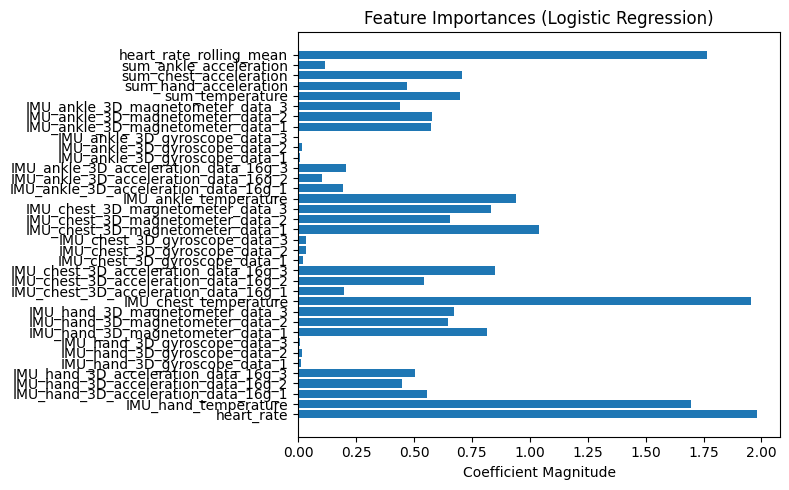

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.utils import resample

# –ü–æ–¥–≤—ã–±–æ—Ä–∫–∞ 30% —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
# X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=int(0.3 * len(X_train)), random_state=42)
X_train_sub, y_train_sub = X_train, y_train

# –ú–∞—Å—à—Ç–∞–±–∏—Ä–æ–≤–∞–Ω–∏–µ
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_sub)
X_test_scaled = scaler.transform(X_test)

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç–æ–∫
le = LabelEncoder().fit(all_classes)
y_train_enc = le.transform(y_train_sub)
y_test_enc = le.transform(y_test)

# –ú–æ–¥–µ–ª—å
model = LogisticRegression(
    max_iter=200,  # –£–º–µ–Ω—å—à–µ–Ω–æ
    random_state=42
)

# –û–±—É—á–µ–Ω–∏–µ
model.fit(X_train_scaled, y_train_enc)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_enc = model.predict(X_test_scaled)
y_pred = le.inverse_transform(y_pred_enc)

# –û—Ü–µ–Ω–∫–∞
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
coefficients = np.abs(model.coef_).mean(axis=0)
features = X_train.columns
plt.figure(figsize=(8, 5))
plt.barh(features, coefficients)
plt.xlabel("Coefficient Magnitude")
plt.title("Feature Importances (Logistic Regression)")
plt.tight_layout()
plt.show()

***
#### CatBoost:
***

CatBoost Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.97      0.97     38458
           2       0.94      0.94      0.94     36929
           3       0.92      0.98      0.95     37797
           4       0.44      0.98      0.61     34730
           5       0.52      0.69      0.59    114758
           6       0.92      0.96      0.94    195963
           7       0.95      0.30      0.46    137233
           9       1.00      0.99      0.99     16725
          10       0.99      0.98      0.99     61921
          11       1.00      0.96      0.98     10890
          12       0.16      0.53      0.25      1736
          13       0.42      0.95      0.59      4640
          16       0.91      0.93      0.92     34996
          17       0.92      0.98      0.95     47581
          18       1.00      0.14      0.24     31473
          19       0.06      1.00      0.12      1902
          20       0.02      0.04      0.03     2

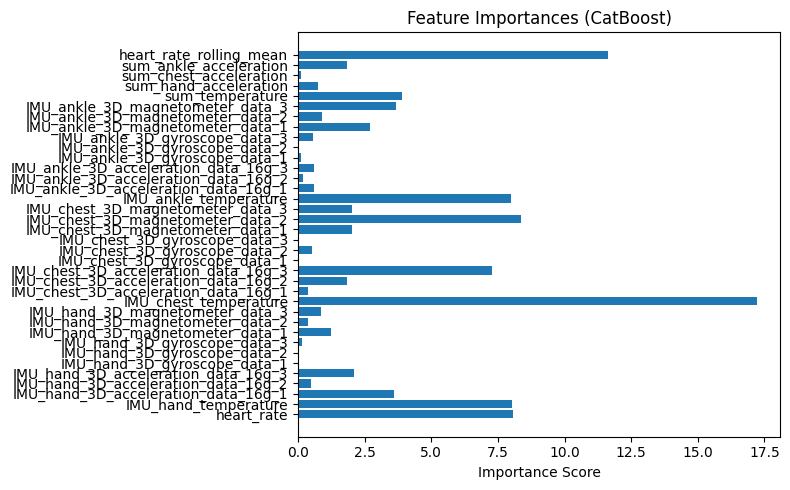

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from sklearn.utils import resample

# –ü–æ–¥–≤—ã–±–æ—Ä–∫–∞ 30% —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö
# X_train_sub, y_train_sub = resample(X_train, y_train, n_samples=int(0.3 * len(X_train)), random_state=42)
X_train_sub, y_train_sub = X_train, y_train

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç–æ–∫
le = LabelEncoder().fit(all_classes)
y_train_enc = le.transform(y_train_sub)
y_test_enc = le.transform(y_test)

# –ú–æ–¥–µ–ª—å
model = CatBoostClassifier(
    iterations=100,  # –£–º–µ–Ω—å—à–µ–Ω–æ
    depth=4,  # –£–º–µ–Ω—å—à–µ–Ω–æ
    learning_rate=0.1,
    loss_function='MultiClass',
    verbose=False,
    random_seed=42
)

# –û–±—É—á–µ–Ω–∏–µ
model.fit(X_train_sub, y_train_enc)

# –ü—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
y_pred_enc = model.predict(X_test).flatten().astype(int)
y_pred = le.inverse_transform(y_pred_enc)

# –û—Ü–µ–Ω–∫–∞
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred))

# –í–∞–∂–Ω–æ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
importances = model.get_feature_importance()
features = X_train.columns
plt.figure(figsize=(8, 5))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importances (CatBoost)")
plt.tight_layout()
plt.show()

***
### XGBoost + HMM:
***

In [22]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight

# –§—É–Ω–∫—Ü–∏—è ordered_unique
def ordered_unique(x):
    """ Return unique elements, maintaining order of appearance """
    return x[np.sort(np.unique(x, return_index=True)[1])]

# –†–µ–∞–ª–∏–∑–∞—Ü–∏—è HMM
class HMM:
    def __init__(self, startprob=None, emissionprob=None, transmat=None, n_iter=100, random_state=None):
        self.startprob = startprob
        self.emissionprob = emissionprob
        self.transmat = transmat
        self.n_iter = n_iter
        self.random_state = random_state
        self.labels = None

    def __str__(self):
        return (
            "HMM Model:\n"
            f"{ {'prior': self.startprob, 'emission': self.emissionprob, 'transition': self.transmat} }"
        )

    def fit(self, Y_pred, Y_true, groups=None):
        self.labels = np.unique(Y_true)
        self.startprob = self.compute_prior(Y_true, self.labels, uniform=False)  # –ù–µ—Ä–∞–≤–Ω–æ–º–µ—Ä–Ω—ã–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏
        self.emissionprob = self.compute_emission(Y_pred, Y_true, self.labels)
        self.transmat = self.compute_transition(Y_true, self.labels, groups)

    def predict(self, Y, groups=None):
        params = {
            'prior': self.startprob,
            'emission': self.emissionprob,
            'transition': self.transmat,
            'labels': self.labels,
        }

        if groups is None:
            Y_vit, _ = self._viterbi(Y, params)
        else:
            Y_vit = np.concatenate([
                self._viterbi(Y[groups == g], params)[0]
                for g in ordered_unique(groups)
            ])
        return Y_vit

    def predict_proba(self, Y, groups=None):
        params = {
            'prior': self.startprob,
            'emission': self.emissionprob,
            'transition': self.transmat,
            'labels': self.labels,
        }
        if groups is None:
            _, probs = self._viterbi(Y, params, True)
        else:
            probs = np.concatenate([
                self._viterbi(Y[groups == g], params, True)[1]
                for g in ordered_unique(groups)
            ])
        return probs

    def optimise(self, **kwargs):
        return

    @staticmethod
    def compute_transition(Y, labels=None, groups=None):
        if labels is None:
            labels = np.unique(Y)

        def _compute_transition(Y):
            transition = np.vstack([
                np.sum(Y[1:][(Y == label)[:-1]].reshape(-1, 1) == labels, axis=0)
                for label in labels
            ])
            return transition

        if groups is None:
            transition = _compute_transition(Y)
        else:
            transition = sum((
                _compute_transition(Y[groups == g])
                for g in ordered_unique(groups)
            ))

        # Laplace smoothing
        transition = transition + 1
        transition = transition / np.sum(transition, axis=1).reshape(-1, 1)
        return transition

    @staticmethod
    def compute_emission(Y_score, Y_true, labels=None):
        if labels is None:
            labels = np.unique(Y_true)

        if Y_score.ndim == 1:
            Y_pred = np.vstack([
                (Y_score == label).astype('float')[:, None]
                for label in labels
            ])
        else:
            Y_pred = Y_score

        emission = np.vstack(
            [np.mean(Y_pred[Y_true == label], axis=0) for label in labels]
        )
        return emission

    @staticmethod
    def compute_prior(Y_true, labels=None, uniform=True):
        if labels is None:
            labels = np.unique(Y_true)

        if uniform:
            prior = np.ones(len(labels)) / len(labels)
        else:
            prior = np.mean(Y_true.reshape(-1, 1) == labels, axis=0)
        return prior

    def _viterbi(self, Y, hmm_params, return_probs=False):
        if len(Y) == 0:
            return np.empty_like(Y), np.array([])

        def log(x):
            SMALL_NUMBER = 1e-16
            return np.log(x + SMALL_NUMBER)

        prior = hmm_params['prior']
        emission = hmm_params['emission']
        transition = hmm_params['transition']
        labels = hmm_params['labels']

        nobs = len(Y)
        nlabels = len(labels)

        if Y.ndim == 1:
            Y = np.where(Y.reshape(-1, 1) == labels)[1]
        else:
            Y = Y

        probs = np.zeros((nobs, nlabels))
        probs[0, :] = log(prior) + log(emission[:, Y[0] if Y.ndim == 1 else np.argmax(Y[0])])
        for j in range(1, nobs):
            for i in range(nlabels):
                probs[j, i] = np.max(
                    log(emission[i, Y[j] if Y.ndim == 1 else np.argmax(Y[j])]) +
                    log(transition[:, i]) +
                    probs[j - 1, :])
        viterbi_path = np.zeros_like(Y, dtype=int) if Y.ndim == 1 else np.zeros(len(Y), dtype=int)
        viterbi_path[-1] = np.argmax(probs[-1, :])
        for j in reversed(range(nobs - 1)):
            viterbi_path[j] = np.argmax(
                log(transition[:, viterbi_path[j + 1]]) +
                probs[j, :])

        viterbi_path = labels[viterbi_path]

        if return_probs:
            return viterbi_path, np.exp(probs)
        return viterbi_path, None

# –ü–æ–¥–≤—ã–±–æ—Ä–∫–∞ 50% —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Å —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ–º –≤—Ä–µ–º–µ–Ω–Ω–æ–≥–æ –ø–æ—Ä—è–¥–∫–∞
n_samples = int(0.5 * len(X_train))
X_train_sub = X_train.iloc[:n_samples].copy()
y_train_sub = y_train.iloc[:n_samples].copy()

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–ª–∏—á–∏—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤ –∏ –¥–æ–±–∞–≤–ª–µ–Ω–∏–µ –æ—Ç—Å—É—Ç—Å—Ç–≤—É—é—â–∏—Ö
all_classes = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]
missing_classes = set(all_classes) - set(np.unique(y_train_sub))
if missing_classes:
    print(f"Warning: Missing classes in training subset: {missing_classes}")
    for cls in missing_classes:
        cls_indices = np.where(y_train == cls)[0]
        if len(cls_indices) > 0:
            first_idx = cls_indices[0]
            X_train_sub = pd.concat([X_train_sub, X_train.iloc[[first_idx]]], ignore_index=True)
            y_train_sub = pd.concat([y_train_sub, y_train.iloc[[first_idx]]], ignore_index=True)

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç–æ–∫
train_classes = np.unique(y_train_sub)
le = LabelEncoder().fit(train_classes)
y_train_enc = le.transform(y_train_sub)
y_test_enc = le.transform(y_test)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_enc), y=y_train_enc)
sample_weights = np.array([class_weights[cls] for cls in y_train_enc])

# –ü–∞–π–ø–ª–∞–π–Ω XGBoost
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', XGBClassifier(
        objective='multi:softprob',
        n_estimators=200,  # –£–≤–µ–ª–∏—á–µ–Ω–æ
        learning_rate=0.05,  # –£–º–µ–Ω—å—à–µ–Ω–æ
        max_depth=10,
        random_state=42
    ))
])

# –û–±—É—á–µ–Ω–∏–µ —Å –≤–µ—Å–∞–º–∏ –∫–ª–∞—Å—Å–æ–≤
pipeline.fit(X_train_sub, y_train_enc, classifier__sample_weight=sample_weights)
y_pred_enc = pipeline.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)
# –°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π
epsilon = 1e-5
y_train_proba = pipeline.predict_proba(X_train_sub) * (1 - 18 * epsilon) + epsilon
y_pred_proba = pipeline.predict_proba(X_test) * (1 - 18 * epsilon) + epsilon

# HMM –¥–ª—è —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
hmm_model = HMM(n_iter=100, random_state=42)
hmm_model.fit(y_train_proba, y_train_enc)

# –ö–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
y_pred_hmm = hmm_model.predict(y_pred_proba)
y_pred_hmm = le.inverse_transform(y_pred_hmm)

# –û—Ü–µ–Ω–∫–∞
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("XGBoost + HMM Classification Report:")
print(classification_report(y_test, y_pred_hmm, zero_division=0))

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫
metrics = {
    'XGBoost': {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_macro': f1_score(y_test, y_pred, average='macro')
    },
    'XGBoost_HMM': {
        'accuracy': accuracy_score(y_test, y_pred_hmm),
        'f1_macro': f1_score(y_test, y_pred_hmm, average='macro')
    }
}

# –í—ã–≤–æ–¥ –º–∞—Ç—Ä–∏—Ü HMM –¥–ª—è –æ—Ç–ª–∞–¥–∫–∏
print(hmm_model)

XGBoost Classification Report:
              precision    recall  f1-score   support

           1       0.78      1.00      0.88     38458
           2       0.56      1.00      0.72     36929
           3       0.61      0.96      0.75     37797
           4       0.33      0.89      0.48     34730
           5       0.59      0.71      0.64    114758
           6       0.85      0.78      0.81    195963
           7       0.46      0.31      0.38    137233
           9       0.74      1.00      0.85     16725
          10       0.00      0.00      0.00     61921
          11       0.97      1.00      0.99     10890
          12       0.13      1.00      0.24      1736
          13       0.56      0.73      0.63      4640
          16       0.94      0.83      0.88     34996
          17       0.97      0.99      0.98     47581
          18       0.19      0.00      0.00     31473
          19       0.07      1.00      0.12      1902
          20       0.00      0.00      0.00     28

In [31]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight

# –§—É–Ω–∫—Ü–∏—è ordered_unique
def ordered_unique(x):
    """Return unique elements, maintaining order of appearance"""
    return np.unique(x)[np.argsort(np.unique(x, return_index=True)[1])]

# –†–µ–∞–ª–∏–∑–∞—Ü–∏—è HMM
class HMM:
    def __init__(self, startprob=None, emissionprob=None, transmat=None, n_iter=100, random_state=None):
        self.startprob = startprob
        self.emissionprob = emissionprob
        self.transmat = transmat
        self.n_iter = n_iter
        self.random_state = random_state
        self.labels = None

    def __str__(self):
        return (
            "HMM Model:\n"
            f"{ {'startprob': self.startprob, 'emission': self.emissionprob, 'transition': self.transmat} }"
        )

    def fit(self, Y_pred, Y_true, groups=None):
        self.labels = np.sort(np.unique(Y_true))
        self.startprob = self.compute_probability(Y_true, self.labels, uniform=False)
        self.emissionprob = self.compute_emission_probability(Y_pred, Y_true, self.labels)
        self.transmat = self.compute_transition_probability(Y_true, self.labels, groups)

    def compute_probability(self, Y_true, labels=None, uniform=False):
        if labels is None:
            labels = np.sort(np.unique(Y_true))

        if uniform:
            probability = np.ones(self.labels(Y_true)) / len(Y_true)
        else:
            probability = np.mean(Y_true.reshape(-1, 1) == labels, axis=0)
        return probability

    def compute_emission_probability(self, Y_score, Y_true, labels=None):
        if labels is None:
            labels = np.sort(np.unique(Y_true))

        if Y_score.ndim == 1:
            Y_pred = np.vstack([
                (Y_score == labels).astype('float')[:, None]
            for label in labels])
        else:
            Y_pred = Y_score

        emission = np.vstack([
            np.mean(Y_pred[Y_true == label], axis=0) for label in labels
        ])
        return emission

    def compute_transition_probability(self, Y, labels=None, groups=None):
        if labels is None:
            labels = np.sort(np.unique(Y))

        def _compute_transition(Y):
            transition = np.vstack([
                np.sum(Y[1:][(Y == label)[:-1]].reshape(-1, 1) == labels, axis=0)
                for label in labels
            ])
            return transition

        if groups is None:
            transition = _compute_transition(Y)
        else:
            transition = sum((
                _compute_transition(Y[groups == g])
                for g in ordered_unique(groups)
            ))

        # Laplace smoothing
        transition = transition + 1
        transition = transition / np.sum(transition, axis=1).reshape(-1, 1)
        return transition

    def predict(self, Y, groups=None):
        params = {
            'prior': self.startprob,
            'emission': self.emissionprob,
            'transition': self.transmat,
            'labels': self.labels,
        }

        if groups is None:
            Y_vit, _ = self._viterbi(Y, params)
        else:
            Y_vit = np.concatenate([
                self._viterbi(Y[groups == g], params)[0]
                for g in ordered_unique(groups)
            ])
        return Y_vit

    def predict_probability(self, Y, groups=None):
        params = {
            'prior': self.startprob,
            'emission': self.emissionprob,
            'transition': self.transmat,
            'labels': self.labels,
        }
        if groups is None:
            _, probs = self._viterbi(Y, params, True)
        else:
            probs = np.concatenate([
                self._viterbi(Y[groups == g], params, True)[1]
                for g in ordered_unique(groups)
            ])
        return probs

    def optimise(self, **kwargs):
        return

    def _viterbi(self, Y, hmm_params, return_probs=False):
        if len(Y) == 0:
            return np.empty_like(Y), np.array([])

        def log(x):
            SMALL_NUMBER = 1e-16
            return np.log(x + SMALL_NUMBER)

        prior = hmm_params['prior']
        emission = hmm_params['emission']
        transition = hmm_params['transition']
        labels = hmm_params['labels']

        nobs = len(Y)
        nlabels = len(labels)

        if Y.ndim == 1:
            Y = np.where(Y.reshape(-1, 1) == labels)[1]
        else:
            Y = Y

        probs = np.zeros((nobs, nlabels))
        probs[0, :] = log(prior) + log(emission[:, Y[0] if Y.ndim == 1 else np.argmax(Y[0])])
        for j in range(1, nobs):
            for i in range(nlabels):
                probs[j, i] = np.max(
                    log(emission[i, Y[j] if Y.ndim == 1 else np.argmax(Y[j])]) +
                    log(transition[:, i]) +
                    probs[j - 1, :])
        viterbi_path = np.zeros_like(Y, dtype=int) if Y.ndim == 1 else np.zeros(len(Y), dtype=int)
        viterbi_path[-1] = np.argmax(probs[-1, :])
        for j in reversed(range(nobs - 1)):
            viterbi_path[j] = np.argmax(
                log(transition[:, viterbi_path[j + 1]]) +
                probs[j, :])

        viterbi_path = labels[viterbi_path]

        if return_probs:
            return viterbi_path, np.exp(probs)
        return viterbi_path, None

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç–æ–∫
le = LabelEncoder().fit(np.unique(y_train))
y_train_enc = le.transform(y_train)
y_test_enc = le.transform(y_test)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_enc), y=y_train_enc)
sample_weights = np.array([class_weights[cls] for cls in y_train_enc])

# –ü–∞–π–ø–ª–∞–π–Ω XGBoost
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', XGBClassifier(
        objective='multi:softprob',
        n_estimators=300,  # –£–≤–µ–ª–∏—á–µ–Ω–æ –¥–ª—è –ø–æ–ª–Ω–æ–π –≤—ã–±–æ—Ä–∫–∏
        learning_rate=0.05,
        max_depth=10,
        random_state=42
    ))
])

# –û–±—É—á–µ–Ω–∏–µ –Ω–∞ –ø–æ–ª–Ω–æ–π –≤—ã–±–æ—Ä–∫–µ
pipeline.fit(X_train, y_train_enc, classifier__sample_weight=sample_weights)
y_pred_enc = pipeline.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)
# –°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π
epsilon = 1e-5
y_train_proba = pipeline.predict_proba(X_train) * (1 - len(np.unique(y_train_enc)) * epsilon) + epsilon
y_pred_proba = pipeline.predict_proba(X_test) * (1 - len(np.unique(y_train_enc)) * epsilon) + epsilon

# HMM –¥–ª—è —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
hmm_model = HMM(n_iter=100, random_state=42)
hmm_model.fit(y_train_proba, y_train_enc)

# –ö–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
y_pred_hmm = hmm_model.predict(y_pred_proba)
y_pred_hmm = le.inverse_transform(y_pred_hmm)

# –û—Ü–µ–Ω–∫–∞
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("XGBoost + HMM Classification Report:")
print(classification_report(y_test, y_pred_hmm, zero_division=0))

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫
metrics = {
    'XGBoost': {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_macro': f1_score(y_test, y_pred, average='macro')
    },
    'XGBoost_HMM': {
        'accuracy': accuracy_score(y_test, y_pred_hmm),
        'f1_macro': f1_score(y_test, y_pred_hmm, average='macro')
    }
}

# –í—ã–≤–æ–¥ –º–∞—Ç—Ä–∏—Ü HMM –¥–ª—è –æ—Ç–ª–∞–¥–∫–∏
print(hmm_model)

XGBoost Classification Report:
              precision    recall  f1-score   support

           1       0.89      1.00      0.94     38458
           2       1.00      0.94      0.97     36929
           3       0.96      1.00      0.98     37797
           4       0.12      0.24      0.16     34730
           5       0.71      0.68      0.69    114758
           6       0.83      0.89      0.86    195963
           7       0.94      0.22      0.35    137233
           9       1.00      1.00      1.00     16725
          10       1.00      1.00      1.00     61921
          11       1.00      1.00      1.00     10890
          12       0.04      0.89      0.08      1736
          13       0.38      0.95      0.55      4640
          16       0.99      1.00      1.00     34996
          17       1.00      0.99      1.00     47581
          18       1.00      0.04      0.07     31473
          19       0.07      1.00      0.12      1902
          20       0.00      0.00      0.00     28

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight

def ordered_unique(x):
    """ Return unique elements, maintaining order of appearance """
    return x[np.sort(np.unique(x, return_index=True)[1])]

class HMM:
    def __init__(self, startprob=None, emissionprob=None, transmat=None, n_iter=100, random_state=None):
        self.startprob = startprob
        self.emissionprob = emissionprob
        self.transmat = transmat
        self.n_iter = n_iter
        self.random_state = random_state
        self.labels = None

    def __str__(self):
        return (
            "HMM Model:\n"
            f"{ {'prior': self.startprob, 'emission': self.emissionprob, 'transition': self.transmat} }"
        )

    def fit(self, Y_pred, Y_true, groups=None):
        self.labels = np.unique(Y_true)
        self.startprob = self.compute_prior(Y_true, self.labels, uniform=False)
        self.emissionprob = self.compute_emission(Y_pred, Y_true, self.labels)
        self.transmat = self.compute_transition(Y_true, self.labels, groups)

    def predict(self, Y, groups=None):
        params = {
            'prior': self.startprob,
            'emission': self.emissionprob,
            'transition': self.transmat,
            'labels': self.labels,
        }
        if groups is None:
            Y_vit, _ = self._viterbi(np.argmax(Y, axis=1), params)
        else:
            Y_vit = np.concatenate([
                self._viterbi(np.argmax(Y[groups == g], axis=1), params)[0]
                for g in ordered_unique(groups)
            ])
        return Y_vit

    def predict_proba(self, Y, groups=None):
        params = {
            'prior': self.startprob,
            'emission': self.emissionprob,
            'transition': self.transmat,
            'labels': self.labels,
        }
        if groups is None:
            _, probs = self._viterbi(np.argmax(Y, axis=1), params, True)
        else:
            probs = np.concatenate([
                self._viterbi(np.argmax(Y[groups == g], axis=1), params, True)[1]
                for g in ordered_unique(groups)
            ])
        return probs

    def optimise(self, **kwargs):
        return

    @staticmethod
    def compute_transition(Y, labels=None, groups=None):
        if labels is None:
            labels = np.unique(Y)
        def _compute_transition(Y):
            transition = np.vstack([
                np.sum(Y[1:][(Y == label)[:-1]].reshape(-1, 1) == labels, axis=0)
                for label in labels
            ])
            return transition
        if groups is None:
            transition = _compute_transition(Y)
        else:
            transition = sum((
                _compute_transition(Y[groups == g])
                for g in ordered_unique(groups)
            ))
        transition = transition + 1  # Laplace smoothing
        transition = transition / np.sum(transition, axis=1).reshape(-1, 1)
        return transition

    @staticmethod
    def compute_emission(Y_score, Y_true, labels=None):
        if labels is None:
            labels = np.unique(Y_true)
        Y_pred = np.argmax(Y_score, axis=1)  # –ë–∏–Ω–∞—Ä–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
        emission = np.zeros((len(labels), len(labels)))
        for i, true_label in enumerate(labels):
            mask = (Y_true == true_label)
            if np.sum(mask) > 0:
                emission[i] = np.bincount(Y_pred[mask], minlength=len(labels)) / np.sum(mask)
        return emission

    @staticmethod
    def compute_prior(Y_true, labels=None, uniform=True):
        if labels is None:
            labels = np.unique(Y_true)
        if uniform:
            prior = np.ones(len(labels)) / len(labels)
        else:
            prior = np.mean(Y_true.reshape(-1, 1) == labels, axis=0)
        return prior

    def _viterbi(self, Y, hmm_params, return_probs=False):
        if len(Y) == 0:
            return np.empty_like(Y), np.array([])
        def log(x):
            SMALL_NUMBER = 1e-16
            return np.log(x + SMALL_NUMBER)
        prior = hmm_params['prior']
        emission = hmm_params['emission']
        transition = hmm_params['transition']
        labels = hmm_params['labels']
        nobs = len(Y)
        nlabels = len(labels)
        probs = np.zeros((nobs, nlabels))
        probs[0, :] = log(prior) + log(emission[:, Y[0]])
        for j in range(1, nobs):
            for i in range(nlabels):
                probs[j, i] = np.max(
                    log(emission[i, Y[j]]) +
                    log(transition[:, i]) +
                    probs[j - 1, :])
        viterbi_path = np.zeros(nobs, dtype=int)
        viterbi_path[-1] = np.argmax(probs[-1, :])
        for j in reversed(range(nobs - 1)):
            viterbi_path[j] = np.argmax(
                log(transition[:, viterbi_path[j + 1]]) +
                probs[j, :])
        viterbi_path = labels[viterbi_path]
        if return_probs:
            return viterbi_path, np.exp(probs)
        return viterbi_path, None

# –ò—Å–ø–æ–ª—å–∑—É–µ–º –ø–æ–ª–Ω—ã–π –Ω–∞–±–æ—Ä –¥–∞–Ω–Ω—ã—Ö
X_train_sub = X_train.copy()
y_train_sub = y_train.copy()

# –ü—Ä–æ–≤–µ—Ä–∫–∞ –Ω–∞–ª–∏—á–∏—è –≤—Å–µ—Ö –∫–ª–∞—Å—Å–æ–≤ (–æ–ø—Ü–∏–æ–Ω–∞–ª—å–Ω–æ, —Ç–∞–∫ –∫–∞–∫ –∏—Å–ø–æ–ª—å–∑—É–µ–º –ø–æ–ª–Ω—ã–π –Ω–∞–±–æ—Ä)
all_classes = [1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 18, 19, 20, 24]
missing_classes = set(all_classes) - set(np.unique(y_train_sub))
if missing_classes:
    print(f"Warning: Missing classes in training subset: {missing_classes}")
    for cls in missing_classes:
        cls_indices = np.where(y_train == cls)[0]
        if len(cls_indices) > 0:
            first_idx = cls_indices[0]
            X_train_sub = pd.concat([X_train_sub, X_train.iloc[[first_idx]]], ignore_index=True)
            y_train_sub = pd.concat([y_train_sub, y_train.iloc[[first_idx]]], ignore_index=True)

# –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç–æ–∫
train_classes = np.unique(y_train_sub)
le = LabelEncoder().fit(train_classes)
y_train_enc = le.transform(y_train_sub)
y_test_enc = le.transform(y_test)

# –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_enc), y=y_train_enc)
sample_weights = np.array([class_weights[cls] for cls in y_train_enc])

# –ü–∞–π–ø–ª–∞–π–Ω XGBoost
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', XGBClassifier(
        objective='multi:softprob',
        n_estimators=300,
        learning_rate=0.05,
        max_depth=10,
        random_state=42
    ))
])

# –û–±—É—á–µ–Ω–∏–µ —Å –≤–µ—Å–∞–º–∏ –∫–ª–∞—Å—Å–æ–≤
pipeline.fit(X_train_sub, y_train_enc, classifier__sample_weight=sample_weights)
y_pred_enc = pipeline.predict(X_test)
y_pred = le.inverse_transform(y_pred_enc)

# –°–≥–ª–∞–∂–∏–≤–∞–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π
epsilon = 1e-5
y_train_proba = pipeline.predict_proba(X_train_sub) * (1 - len(np.unique(y_train_enc)) * epsilon) + epsilon
y_pred_proba = pipeline.predict_proba(X_test) * (1 - len(np.unique(y_train_enc)) * epsilon) + epsilon

# HMM –¥–ª—è —Å–≥–ª–∞–∂–∏–≤–∞–Ω–∏—è –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π
hmm_model = HMM(n_iter=100, random_state=42)
hmm_model.fit(y_train_proba, y_train_enc)

# –ö–æ—Ä—Ä–µ–∫—Ç–∏—Ä–æ–≤–∫–∞ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π —Å —É—á—ë—Ç–æ–º —Å—É–±—ä–µ–∫—Ç–æ–≤
groups_test = test_df['subject_id'].values  # –ü—Ä–µ–¥–ø–æ–ª–∞–≥–∞–µ–º, —á—Ç–æ –µ—Å—Ç—å subject_id
y_pred_hmm = hmm_model.predict(y_pred_proba, groups=groups_test)
y_pred_hmm = le.inverse_transform(y_pred_hmm)

# –û—Ü–µ–Ω–∫–∞
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))
print("XGBoost + HMM Classification Report:")
print(classification_report(y_test, y_pred_hmm, zero_division=0))

# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫
metrics = {
    'XGBoost': {
        'accuracy': accuracy_score(y_test, y_pred),
        'f1_macro': f1_score(y_test, y_pred, average='macro')
    },
    'XGBoost_HMM': {
        'accuracy': accuracy_score(y_test, y_pred_hmm),
        'f1_macro': f1_score(y_test, y_pred_hmm, average='macro')
    }
}

# –í—ã–≤–æ–¥ –º–∞—Ç—Ä–∏—Ü HMM –¥–ª—è –æ—Ç–ª–∞–¥–∫–∏
print(hmm_model)

In [38]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings('ignore')

def ordered_unique(x):
    """Return unique elements, maintaining order of appearance"""
    _, idx = np.unique(x, return_index=True)
    return x[np.sort(idx)]

class ImprovedHMM:
    def __init__(self, n_iter=100, random_state=None, smoothing_alpha=0.1):
        self.n_iter = n_iter
        self.random_state = random_state
        self.smoothing_alpha = smoothing_alpha
        self.labels = None
        self.startprob = None
        self.emissionprob = None
        self.transmat = None
        self.n_states = None
        
    def fit(self, Y_pred_proba, Y_true, groups=None, sequence_ids=None):
        self.labels = np.sort(np.unique(Y_true))
        self.n_states = len(self.labels)
        
        self.startprob = self._compute_start_probability(Y_true, sequence_ids)
        self.emissionprob = self._compute_emission_probability(Y_pred_proba, Y_true)
        self.transmat = self._compute_transition_probability(Y_true, groups, sequence_ids)
        
        if self.n_iter > 0:
            self._em_optimization(Y_pred_proba, Y_true, sequence_ids)
    
    def _compute_start_probability(self, Y_true, sequence_ids=None):
        if sequence_ids is not None:
            first_elements = []
            for seq_id in np.unique(sequence_ids):
                seq_mask = sequence_ids == seq_id
                seq_indices = np.where(seq_mask)[0]
                if len(seq_indices) > 0:
                    first_elements.append(Y_true[seq_indices[0]])
            first_elements = np.array(first_elements)
        else:
            first_elements = Y_true[:1] if len(Y_true) > 0 else Y_true
            
        startprob = np.zeros(self.n_states)
        for i, label in enumerate(self.labels):
            startprob[i] = np.sum(first_elements == label) + self.smoothing_alpha
        
        return startprob / np.sum(startprob)
    
    def _compute_emission_probability(self, Y_pred_proba, Y_true):
        emission = np.zeros((self.n_states, self.n_states))
        
        for i, true_label in enumerate(self.labels):
            mask = Y_true == true_label
            if np.sum(mask) > 0:
                avg_proba = np.mean(Y_pred_proba[mask], axis=0)
                emission[i] = avg_proba + self.smoothing_alpha
            else:
                emission[i] = np.ones(self.n_states) * self.smoothing_alpha
        
        emission = emission / np.sum(emission, axis=1, keepdims=True)
        return emission
    
    def _compute_transition_probability(self, Y_true, groups=None, sequence_ids=None):
        transition = np.zeros((self.n_states, self.n_states))
        
        if sequence_ids is not None:
            for seq_id in np.unique(sequence_ids):
                seq_mask = sequence_ids == seq_id
                seq_y = Y_true[seq_mask]
                if len(seq_y) > 1:
                    transition += self._compute_single_sequence_transitions(seq_y)
        elif groups is not None:
            for group in np.unique(groups):
                group_mask = groups == group
                group_y = Y_true[group_mask]
                if len(group_y) > 1:
                    transition += self._compute_single_sequence_transitions(group_y)
        else:
            transition = self._compute_single_sequence_transitions(Y_true)
        
        transition += self.smoothing_alpha
        row_sums = np.sum(transition, axis=1, keepdims=True)
        transition = transition / np.where(row_sums == 0, 1, row_sums)
        
        return transition
    
    def _compute_single_sequence_transitions(self, sequence):
        transition = np.zeros((self.n_states, self.n_states))
        
        for i in range(len(sequence) - 1):
            current_state = np.where(self.labels == sequence[i])[0][0]
            next_state = np.where(self.labels == sequence[i + 1])[0][0]
            transition[current_state, next_state] += 1
            
        return transition
    
    def _em_optimization(self, Y_pred_proba, Y_true, sequence_ids=None):
        for iteration in range(min(10, self.n_iter)):  # –û–≥—Ä–∞–Ω–∏—á–∏–≤–∞–µ–º –∏—Ç–µ—Ä–∞—Ü–∏–∏ –¥–ª—è —Å–∫–æ—Ä–æ—Å—Ç–∏
            if sequence_ids is not None:
                all_gamma = []
                all_xi = []
                for seq_id in np.unique(sequence_ids):
                    seq_mask = sequence_ids == seq_id
                    seq_proba = Y_pred_proba[seq_mask]
                    if len(seq_proba) > 1:
                        gamma, xi = self._forward_backward(seq_proba)
                        all_gamma.append(gamma)
                        all_xi.append(xi)
                
                if all_gamma:
                    self._update_parameters(all_gamma, all_xi)
            else:
                if len(Y_pred_proba) > 1:
                    gamma, xi = self._forward_backward(Y_pred_proba)
                    self._update_parameters([gamma], [xi])
    
    def _forward_backward(self, observations):
        n_obs = len(observations)
        
        # Forward pass
        alpha = np.zeros((n_obs, self.n_states))
        alpha[0] = self.startprob * self.emissionprob[:, np.argmax(observations[0])]
        alpha[0] = alpha[0] / (np.sum(alpha[0]) + 1e-10)
        
        for t in range(1, n_obs):
            for j in range(self.n_states):
                alpha[t, j] = self.emissionprob[j, np.argmax(observations[t])] * \
                             np.sum(alpha[t-1] * self.transmat[:, j])
            alpha[t] = alpha[t] / (np.sum(alpha[t]) + 1e-10)
        
        # Backward pass
        beta = np.zeros((n_obs, self.n_states))
        beta[-1] = 1
        
        for t in range(n_obs - 2, -1, -1):
            for i in range(self.n_states):
                beta[t, i] = np.sum(self.transmat[i] * 
                                   self.emissionprob[:, np.argmax(observations[t+1])] * 
                                   beta[t+1])
            beta[t] = beta[t] / (np.sum(beta[t]) + 1e-10)
        
        # Gamma
        gamma = alpha * beta
        gamma = gamma / (np.sum(gamma, axis=1, keepdims=True) + 1e-10)
        
        # Xi
        xi = np.zeros((n_obs - 1, self.n_states, self.n_states))
        for t in range(n_obs - 1):
            for i in range(self.n_states):
                for j in range(self.n_states):
                    xi[t, i, j] = alpha[t, i] * self.transmat[i, j] * \
                                 self.emissionprob[j, np.argmax(observations[t+1])] * \
                                 beta[t+1, j]
            xi[t] = xi[t] / (np.sum(xi[t]) + 1e-10)
        
        return gamma, xi
    
    def _update_parameters(self, all_gamma, all_xi):
        if not all_gamma or not all_xi:
            return
            
        self.startprob = np.mean([gamma[0] for gamma in all_gamma], axis=0)
        
        xi_sum = np.sum([np.sum(xi, axis=0) for xi in all_xi], axis=0)
        gamma_sum = np.sum([np.sum(gamma[:-1], axis=0) for gamma in all_gamma], axis=0)
        
        for i in range(self.n_states):
            if gamma_sum[i] > 1e-10:
                self.transmat[i] = xi_sum[i] / gamma_sum[i]
            else:
                self.transmat[i] = np.ones(self.n_states) / self.n_states
    
    def predict(self, Y_pred_proba, sequence_ids=None):
        if sequence_ids is not None:
            predictions = []
            for seq_id in np.unique(sequence_ids):
                seq_mask = sequence_ids == seq_id
                seq_proba = Y_pred_proba[seq_mask]
                if len(seq_proba) > 0:
                    seq_pred = self._viterbi(seq_proba)
                    predictions.extend(seq_pred)
            return np.array(predictions)
        else:
            return self._viterbi(Y_pred_proba)
    
    def _viterbi(self, observations):
        n_obs = len(observations)
        
        if n_obs == 0:
            return np.array([])
        
        delta = np.zeros((n_obs, self.n_states))
        psi = np.zeros((n_obs, self.n_states), dtype=int)
        
        obs_idx = np.argmax(observations[0])
        delta[0] = np.log(self.startprob + 1e-10) + np.log(self.emissionprob[:, obs_idx] + 1e-10)
        
        for t in range(1, n_obs):
            obs_idx = np.argmax(observations[t])
            for j in range(self.n_states):
                trans_scores = delta[t-1] + np.log(self.transmat[:, j] + 1e-10)
                psi[t, j] = np.argmax(trans_scores)
                delta[t, j] = np.max(trans_scores) + np.log(self.emissionprob[j, obs_idx] + 1e-10)
        
        states = np.zeros(n_obs, dtype=int)
        states[-1] = np.argmax(delta[-1])
        
        for t in range(n_obs - 2, -1, -1):
            states[t] = psi[t + 1, states[t + 1]]
        
        return self.labels[states]

def run_improved_classification(X_train, y_train, X_test, y_test, sequence_ids_train=None, sequence_ids_test=None, use_hmm=True):
    """
    –ì–õ–ê–í–ù–ê–Ø –§–£–ù–ö–¶–ò–Ø - –ü–†–û–°–¢–û –ó–ê–ü–£–°–¢–ò–¢–ï –≠–¢–£ –§–£–ù–ö–¶–ò–Æ –°–û –°–í–û–ò–ú–ò –î–ê–ù–ù–´–ú–ò!
    
    Parameters:
    -----------
    X_train, X_test : array-like
        –í–∞—à–∏ –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –∏ —Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏—è
    y_train, y_test : array-like  
        –í–∞—à–∏ —Ü–µ–ª–µ–≤—ã–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ
    sequence_ids_train, sequence_ids_test : array-like, optional
        ID –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π (–µ—Å–ª–∏ –¥–∞–Ω–Ω—ã–µ –∏–º–µ—é—Ç –≤—Ä–µ–º–µ–Ω–Ω—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É)
    use_hmm : bool
        –ò—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª–∏ HMM (–ø–æ —É–º–æ–ª—á–∞–Ω–∏—é True)
    
    Returns:
    --------
    dict —Å —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞–º–∏ –∏ –º–µ—Ç—Ä–∏–∫–∞–º–∏
    """
    
    print("üöÄ –ù–∞—á–∏–Ω–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ —É–ª—É—á—à–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏...")
    print(f"üìä –†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: {X_train.shape}")
    print(f"üìä –†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: {X_test.shape}")
    print(f"üìä –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤: {len(np.unique(y_train))}")
    
    # –ö–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –º–µ—Ç–æ–∫
    le = LabelEncoder()
    y_train_enc = le.fit_transform(y_train)
    y_test_enc = le.transform(y_test)
    
    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –≤–µ—Å–æ–≤ –∫–ª–∞—Å—Å–æ–≤
    class_weights = compute_class_weight('balanced', classes=np.unique(y_train_enc), y=y_train_enc)
    sample_weights = np.array([class_weights[cls] for cls in y_train_enc])
    
    # –°–æ–∑–¥–∞–Ω–∏–µ —É–ª—É—á—à–µ–Ω–Ω–æ–≥–æ –ø–∞–π–ø–ª–∞–π–Ω–∞
    pipeline = Pipeline([
        ('scaler', RobustScaler()),
        ('classifier', XGBClassifier(
            objective='multi:softprob',
            n_estimators=300,
            learning_rate=0.05,
            max_depth=8,
            subsample=0.8,
            colsample_bytree=0.8,
            min_child_weight=3,
            gamma=0.1,
            reg_alpha=0.1,
            reg_lambda=1.0,
            random_state=42,
            n_jobs=-1,
            verbosity=0
        ))
    ])
    
    # –û–±—É—á–µ–Ω–∏–µ –±–∞–∑–æ–≤–æ–≥–æ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä–∞
    print("üî• –û–±—É—á–µ–Ω–∏–µ XGBoost...")
    pipeline.fit(X_train, y_train_enc, classifier__sample_weight=sample_weights)
    
    # –ë–∞–∑–æ–≤—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
    y_pred_base_enc = pipeline.predict(X_test)
    y_pred_base = le.inverse_transform(y_pred_base_enc)
    
    # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ –±–∞–∑–æ–≤—ã—Ö –º–µ—Ç—Ä–∏–∫
    base_accuracy = accuracy_score(y_test, y_pred_base)
    base_f1 = f1_score(y_test, y_pred_base, average='macro', zero_division=0)
    
    print(f"‚úÖ XGBoost –æ–±—É—á–µ–Ω! Accuracy: {base_accuracy:.4f}, F1-macro: {base_f1:.4f}")
    
    results = {
        'base_predictions': y_pred_base,
        'base_accuracy': base_accuracy,
        'base_f1_macro': base_f1,
        'pipeline': pipeline,
        'label_encoder': le
    }
    
    if use_hmm:
        # –ü–æ–ª—É—á–µ–Ω–∏–µ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–µ–π
        epsilon = 1e-6
        n_classes = len(np.unique(y_train_enc))
        
        y_train_proba = pipeline.predict_proba(X_train)
        y_train_proba = y_train_proba * (1 - n_classes * epsilon) + epsilon
        
        y_test_proba = pipeline.predict_proba(X_test)
        y_test_proba = y_test_proba * (1 - n_classes * epsilon) + epsilon
        
        # –û–±—É—á–µ–Ω–∏–µ HMM
        print("üß† –û–±—É—á–µ–Ω–∏–µ HMM...")
        hmm_model = ImprovedHMM(n_iter=20, random_state=42, smoothing_alpha=0.01)
        hmm_model.fit(y_train_proba, y_train_enc, sequence_ids=sequence_ids_train)
        
        # HMM –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
        y_pred_hmm_enc = hmm_model.predict(y_test_proba, sequence_ids=sequence_ids_test)
        y_pred_hmm = le.inverse_transform(y_pred_hmm_enc)
        
        # –í—ã—á–∏—Å–ª–µ–Ω–∏–µ HMM –º–µ—Ç—Ä–∏–∫
        hmm_accuracy = accuracy_score(y_test, y_pred_hmm)
        hmm_f1 = f1_score(y_test, y_pred_hmm, average='macro', zero_division=0)
        
        print(f"üéØ HMM –æ–±—É—á–µ–Ω–∞! Accuracy: {hmm_accuracy:.4f}, F1-macro: {hmm_f1:.4f}")
        
        # –ì–∏–±—Ä–∏–¥–Ω—ã–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è
        y_pred_hybrid = combine_predictions(y_pred_base, y_pred_hmm, y_test_proba, weight_hmm=0.3)
        hybrid_accuracy = accuracy_score(y_test, y_pred_hybrid)
        hybrid_f1 = f1_score(y_test, y_pred_hybrid, average='macro', zero_division=0)
        
        print(f"üîÆ –ì–∏–±—Ä–∏–¥–Ω–∞—è –º–æ–¥–µ–ª—å! Accuracy: {hybrid_accuracy:.4f}, F1-macro: {hybrid_f1:.4f}")
        
        results.update({
            'hmm_predictions': y_pred_hmm,
            'hmm_accuracy': hmm_accuracy,
            'hmm_f1_macro': hmm_f1,
            'hybrid_predictions': y_pred_hybrid,
            'hybrid_accuracy': hybrid_accuracy,
            'hybrid_f1_macro': hybrid_f1,
            'hmm_model': hmm_model
        })
    
    # –í—ã–≤–æ–¥ –ø–æ–¥—Ä–æ–±–Ω—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤
    print("\n" + "="*60)
    print("üìà –ü–û–î–†–û–ë–ù–´–ï –†–ï–ó–£–õ–¨–¢–ê–¢–´:")
    print("="*60)
    
    print(f"\nüéØ XGBoost (–±–∞–∑–æ–≤–∞—è –º–æ–¥–µ–ª—å):")
    print(f"   Accuracy: {base_accuracy:.4f}")  
    print(f"   F1-macro: {base_f1:.4f}")
    print(classification_report(y_test, y_pred_base, zero_division=0))
    
    if use_hmm:
        print(f"\nüß† XGBoost + HMM:")
        print(f"   Accuracy: {hmm_accuracy:.4f}")
        print(f"   F1-macro: {hmm_f1:.4f}")
        print(classification_report(y_test, y_pred_hmm, zero_division=0))
        
        print(f"\nüîÆ –ì–∏–±—Ä–∏–¥–Ω–∞—è –º–æ–¥–µ–ª—å:")
        print(f"   Accuracy: {hybrid_accuracy:.4f}")
        print(f"   F1-macro: {hybrid_f1:.4f}")
        print(classification_report(y_test, y_pred_hybrid, zero_division=0))
        
        # –û–ø—Ä–µ–¥–µ–ª—è–µ–º –ª—É—á—à—É—é –º–æ–¥–µ–ª—å
        best_model = 'XGBoost'
        best_acc = base_accuracy
        
        if hmm_accuracy > best_acc:
            best_model = 'XGBoost + HMM'
            best_acc = hmm_accuracy
            
        if hybrid_accuracy > best_acc:
            best_model = '–ì–∏–±—Ä–∏–¥–Ω–∞—è'
            best_acc = hybrid_accuracy
            
        print(f"\nüèÜ –õ–£–ß–®–ê–Ø –ú–û–î–ï–õ–¨: {best_model} (Accuracy: {best_acc:.4f})")
    
    print("="*60)
    
    return results

def combine_predictions(pred_base, pred_hmm, probabilities, weight_hmm=0.3):
    """–ö–æ–º–±–∏–Ω–∏—Ä–æ–≤–∞–Ω–∏–µ –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π"""
    unique_labels = np.unique(np.concatenate([pred_base, pred_hmm]))
    n_samples = len(pred_base)
    n_classes = len(unique_labels)
    
    base_proba = np.zeros((n_samples, n_classes))
    hmm_proba = np.zeros((n_samples, n_classes))
    
    for i, label in enumerate(unique_labels):
        base_proba[pred_base == label, i] = 1.0
        hmm_proba[pred_hmm == label, i] = 1.0
    
    combined_proba = (1 - weight_hmm) * probabilities + weight_hmm * hmm_proba
    pred_indices = np.argmax(combined_proba, axis=1)
    return unique_labels[pred_indices]


In [ ]:

results = run_improved_classification(X_train, y_train, X_test, y_test, use_hmm=True)

üöÄ –ù–∞—á–∏–Ω–∞–µ–º –æ–±—É—á–µ–Ω–∏–µ —É–ª—É—á—à–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏...
üìä –†–∞–∑–º–µ—Ä –æ–±—É—á–∞—é—â–µ–π –≤—ã–±–æ—Ä–∫–∏: (3509097, 36)
üìä –†–∞–∑–º–µ—Ä —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–∏: (877284, 36)
üìä –ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Å–æ–≤: 18
üî• –û–±—É—á–µ–Ω–∏–µ XGBoost...
‚úÖ XGBoost –æ–±—É—á–µ–Ω! Accuracy: 0.6680, F1-macro: 0.6009
üß† –û–±—É—á–µ–Ω–∏–µ HMM...
